Нейросеть CLIP: https://huggingface.co/docs/transformers/model_doc/clip,
https://habr.com/ru/articles/539312/

Библиотека imgbeddings: https://github.com/minimaxir/imgbeddings

In [1]:
import os
from tqdm import tqdm

from PIL import Image
from imgbeddings import imgbeddings

import cv2
from sklearn.metrics.pairwise import pairwise_distances
from matplotlib import pyplot as plt

ImportError: cannot import name 'cached_download' from 'huggingface_hub' (/home/demon/.local/lib/python3.13/site-packages/huggingface_hub/__init__.py)

In [23]:
def load_images_and_imgbeddings(file_list, image_dir):
    _imgbeddings = imgbeddings()
    name2embeddings = dict()
    for image_filename in tqdm(file_list):
        img_path = os.path.join(image_dir, image_filename)
        image = Image.open(img_path)
        embedding = _imgbeddings.to_embeddings(image)
        name2embeddings[image_filename] = embedding[0]
    return name2embeddings

In [24]:
image_dir = "dataset"

In [26]:
file_list = os.listdir(image_dir)
img_embeddings = load_images_and_imgbeddings(file_list, image_dir)

100%|██████████| 9605/9605 [10:04<00:00, 15.88it/s]


In [27]:
_X = [img_embeddings[img_filename] for img_filename in file_list]
data_dist = pairwise_distances(_X, metric='l1')

In [84]:
test_img_num = 5000

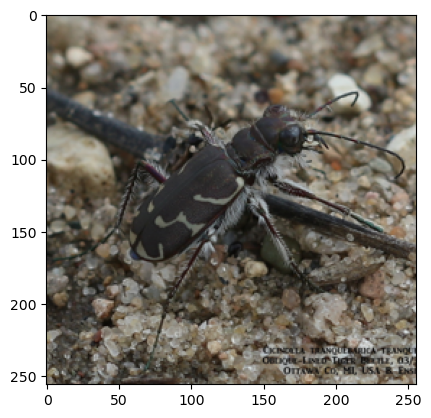

In [85]:
img = cv2.imread(os.path.join(image_dir, file_list[test_img_num]), cv2.IMREAD_COLOR)
plt.imshow(img[...,::-1])

In [86]:
indices = [el[0] for el in sorted(enumerate(data_dist[test_img_num]), key=lambda x: x[1])[:6]]

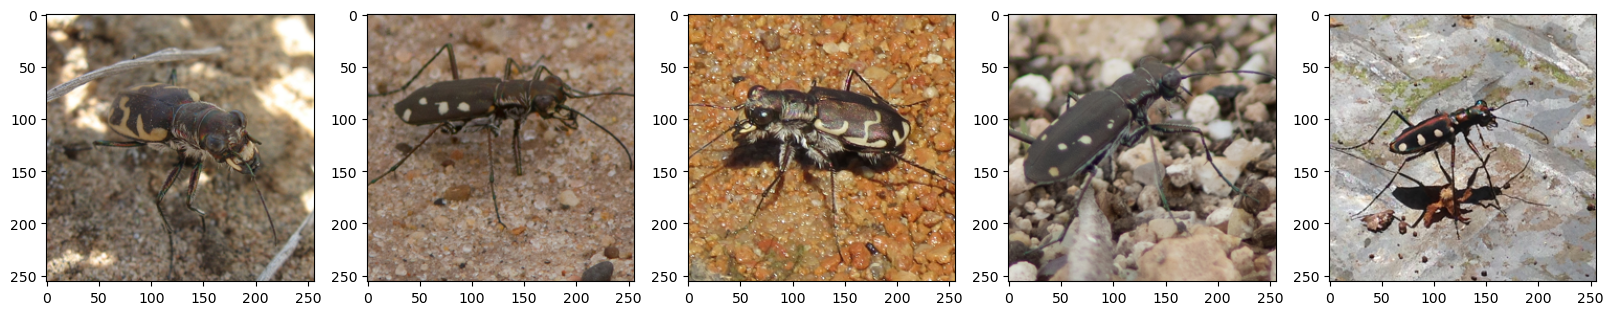

In [87]:
plt.figure(1, figsize = (20, 5))
tmp = 0
for ind in indices:
    if ind != test_img_num:
        tmp += 1
        plt.subplot(15*10 + tmp)
        img = cv2.imread(os.path.join(image_dir, file_list[ind]), cv2.IMREAD_COLOR)
        plt.imshow(img[...,::-1])